# Week2 Lab Assignment: Image Formation and Camera Fundamentals
## Objective:
1. To understand the concepts of pinhole cameras, lenses, depth of field, and perspective projection.

2. To gain hands-on experience with Python to simulate key aspects of image formation.

3. To critically analyze the properties and limitations of imaging systems.


---------------------------------------------------------
### Part 1: Coding Tasks

#### Task 1: Simulating a Pinhole Camera

Write a Python program to simulate a pinhole camera. Your program should:

1. Given a set of 3D points;

2. Build up pinhole camera model:

$$
\mathbf{P} = 
\begin{bmatrix}
x \\ 
y \\ 
z
\end{bmatrix}
\quad \rightarrow \quad
\mathbf{P'} = 
\begin{bmatrix}
x' \\ 
y'
\end{bmatrix}
$$

$$
\begin{cases}
x' = f \cdot \frac{x}{z} \\
y' = f \cdot \frac{y}{z}
\end{cases}
$$

   
3. Project the 3D points onto an image plane using a pinhole camera model.

4. Visualize the 3D point cloud, pinhole camera, and 2D projection.

5. Try to vary the position and focal length of the pinhole and observe the effect on the 2D projection.

-------------------------------------------------------------

Code Hint:

Use basic matrix operations to simulate the perspective projection.

Use matplotlib to visualize the input scene and projected image.

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from PIL import Image

In [22]:
# A set of 3D points
points_3D = [
    [35.712, 158.416, 129.496],
    [127.854, 15.362, 153.566],
    [144.727, 41.938, 223.118],
    [121.367, 95.705, 191.650],
    [52.510, 184.325, 116.347],
    [128.397, 86.877, 180.812],
    [61.159, 151.921, 73.485],
    [135.178, 81.544, 193.987],
    [161.561, 152.509, 182.324]
]

# Convert to NumPy array
points_3D = np.array(points_3D)

# Camera parameters
camera_position = [50, 50, 50]  # Camera position (cx, cy, cz)

f = 10  # Focal length

In [23]:
# Define the pinhole projection function
def pinhole_projection(points_3D, camera_position, f):
    """
    Simulate pinhole camera projection.
    points_3D: N x 3    
    camera_position: Camera position (cx, cy, cz)
    f: Camera focal length
    Return: Projected points array (N x 2)
    """
    # fill in the code here
    
    # Let the camera coordinate be the origin.
    points_camera = points_3D - camera_position
    
    x_c = points_3D[:, 0]
    y_c = points_3D[:, 1]
    z_c = points_3D[:, 2]
    
    x_projected = f * (x_c / z_c)
    y_projected = f * (y_c / z_c)
    
    points_2D = np.column_stack((x_projected, y_projected))
    
    return points_2D

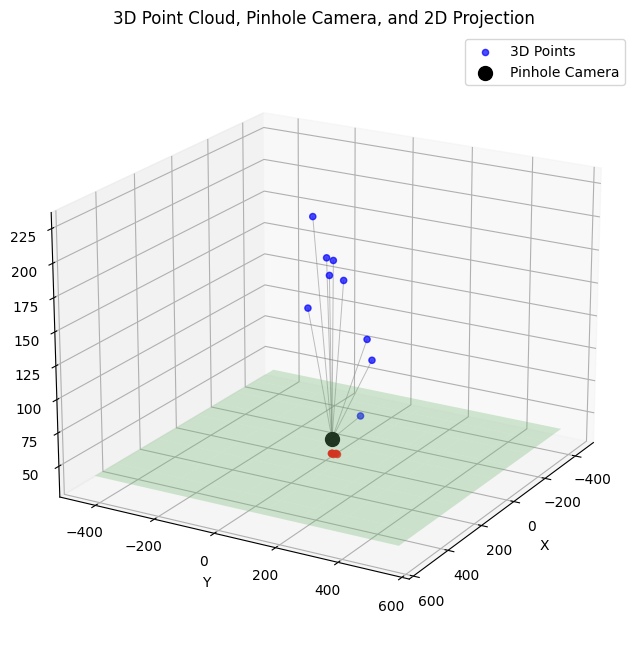

In [24]:
# Project to 2D plane
points_2D = pinhole_projection(points_3D, camera_position, f)

# Visualization: 3D point cloud, pinhole camera, and 2D projection
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D point cloud
ax.scatter(points_3D[:, 0], points_3D[:, 1], points_3D[:, 2], c='blue', alpha=0.7, label="3D Points")

# Plot pinhole camera position
ax.scatter([camera_position[0]], [camera_position[1]], [camera_position[2]],
           c='black', s=100, marker='o', label="Pinhole Camera")

# Plot projection lines and projection points
z_projection_plane = camera_position[2] - f  # Projection plane z = camera position z - focal length


for point, proj in zip(points_3D, points_2D):
    # Corrected projection point coordinates
    proj_x = proj[0] + camera_position[0]  # Global x coordinate of projection point
    proj_y = proj[1] + camera_position[1]  # Global y coordinate of projection point
    proj_z = z_projection_plane  # Global z coordinate of projection point aligned with the plane

    # Plot projection lines
    ax.plot([camera_position[0], point[0]], [camera_position[1], point[1]], [camera_position[2], point[2]],
            c='gray', alpha=0.5, linewidth=0.7)
    # Plot projection points
    ax.scatter(proj_x, proj_y, proj_z, c='red', alpha=0.7)

# Plot dynamic 2D projection plane
x_range = np.linspace(-500, 500, 10)
y_range = np.linspace(-500, 500, 10)
x_plane, y_plane = np.meshgrid(x_range, y_range)
z_plane = np.zeros_like(x_plane) + z_projection_plane  # Projection plane z = camera position z - focal length
ax.plot_surface(x_plane + camera_position[0], y_plane + camera_position[1], z_plane,
                color='lightgreen', alpha=0.3)

# Set legend and view
ax.set_title("3D Point Cloud, Pinhole Camera, and 2D Projection")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=20, azim=30)
ax.legend()

plt.show()

##### Change the camera position and focal length to observe the effect on the 2D projection.

------------------------------
### Task 2: Handling Lens Aberrations
Simulate geometric distortions caused by lenses (e.g., radial distortion). Apply barrel distortion to the provided image and visualize the effect.

Code Hint:

Use a distortion model such as :
### Radial Distortion Formula

The radial distortion is given by:

$$
r = \sqrt{x^2 + y^2}
$$

$$
x' = x \cdot \left(1 + k \cdot r^2\right)
$$

$$
y' = y \cdot \left(1 + k \cdot r^2\right)
$$

### Explanation:

- \( r \): Distance from the point \((x, y)\) to the origin.
- \( k \): Distortion coefficient.
- \( (x', y') \): Distorted coordinates.



---------------------------

In [17]:
def apply_radial_distortion(x, y, k):
    """
    Simulate barrel distortion
    :param x: Original image point x coordinate
    :param y: Original image point y coordinate
    :param k: Distortion coefficient
    :return: Distorted coordinates (x', y')
    """
    # fill in the code here
    r = np.sqrt(x**2 + y**2)

    # Radial distortion formula
    x_distorted = x * (1 + k * r**2)
    y_distorted = y * (1 + k * r**2)
    return x_distorted, y_distorted

def apply_distortion_to_image(image_path, k):
    """Apply barrel or pincushion distortion to the image"""
    # fill in the code here
    imgBGR = cv2.imread(image_path)
    # Load image and convert to RGB
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    # Build normalized grid points
    
    # Get image dimensions
    h, w = imgRGB.shape[:2]
    cx, cy = w // 2, h // 2  # Principal point (image center)
    
    # Create a grid of normalized coordinates relative to the center
    x = np.linspace(-cx, cx, w)
    y = np.linspace(-cy, cy, h)
    xv, yv = np.meshgrid(x, y)  # xv and yv represent x and y coordinates respectively
    
    xv_distorted, yv_distorted = apply_radial_distortion(x=xv, y=yv, k=k)
    
    # Map distorted coordinates back to the original image space
    xv_distorted = (xv_distorted + cx).astype(np.float32)
    yv_distorted = (yv_distorted + cy).astype(np.float32)
    
    # Use OpenCV remap to create the distorted image
    distorted_img = cv2.remap(imgRGB, xv_distorted, yv_distorted, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    
    return distorted_img

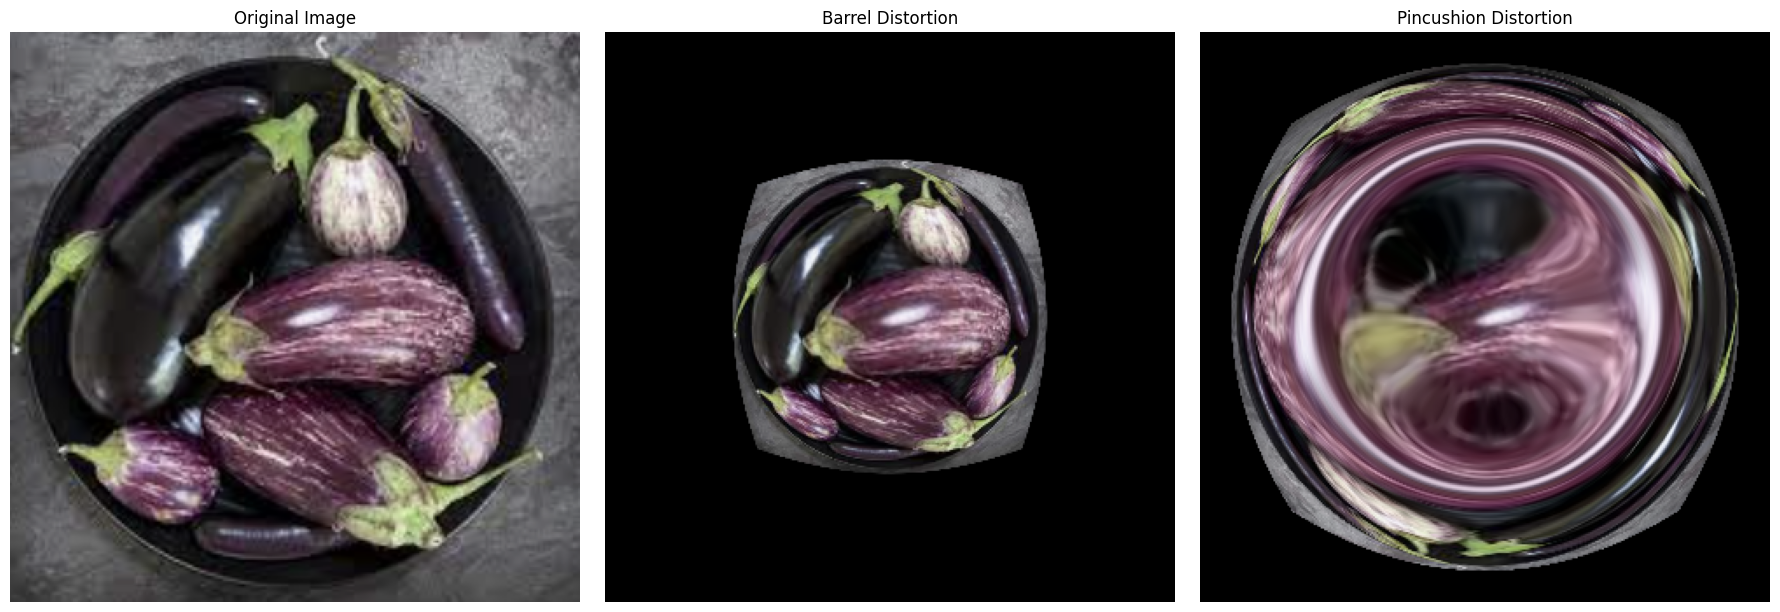

In [18]:
import cv2

# Test distortion effect
image_path = "image.png"  # Replace with your image path

# Barrel distortion
k1 = 0.0001
output_image_1 = apply_distortion_to_image(image_path, k1)

# Pincushion distortion
k2 = -0.0001
output_image_2 = apply_distortion_to_image(image_path, k2)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original image
original_img = np.asarray(Image.open(image_path).convert('RGB'))
axes[0].imshow(original_img)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Barrel distortion
axes[1].imshow(output_image_1)
axes[1].set_title("Barrel Distortion")
axes[1].axis("off")

# Pincushion distortion
axes[2].imshow(output_image_2)
axes[2].set_title("Pincushion Distortion")
axes[2].axis("off")

plt.tight_layout()
plt.show()


##### Change the distortion coefficient to observe the effect on the image.
--------------------------------

## Part 2: Critical Thinking Questions

---------------------------




### 1.  Why does reducing the pinhole size in a pinhole camera improve image sharpness? What are the trade-offs of making the pinhole too small?


In a larger pinhole, light rays from different points in the scene can overlap on the image plane, leading to a loss of detail. A smaller pinhole minimizes this overlap. If the pinhole too small, it may cause the diffraction. This causes the light rays to spread out again, creating a blurring effect.

### 2. How does the concept of depth of field apply to robotic vision? Provide an example of a scenario where a large DoF is critical.


It affects how much of a scene can remain in focus at varying distances from the camera. In robotic systems, the DoF determines the clarity of objects in the environment, which is crucial for tasks such as navigation, object recognition, and manipulation.

### 3. Barrel distortion is a common lens imperfection. How might such distortion impact robotic vision applications like SLAM (Simultaneous Localization and Mapping)? How could you correct for it?

SLAM relies on detecting and matching features (e.g., edges, corners) in images. Barrel distortion can warp these features, causing mismatches between frames and reducing the accuracy of map construction and localization. I think we can use deep learning model to solve the problem (e.g., CNN model).